In [134]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [64]:
data = pd.read_table('File (1).txt', encoding="UTF-16 LE")
data.head(5)

,Спортсмен,Класс лука,05.08.2013,06.09.2013,10.10.2013,29.10.2013,11.11.2013,29.12.2013,05.08.2014,06.09.2014,...,10.10.2022,29.10.2022,11.11.2022,29.12.2022,Unnamed: 62,Unnamed: 63,Unnamed: 64,Unnamed: 65,Unnamed: 66,Unnamed: 67
0,Дворецкий Алексей,Классический лук М,567.0,572.0,560.0,554.0,560.0,561.0,572.0,567.0,...,572.0,561.0,560.0,556.0,NaN,NaN,NaN,NaN,NaN,NaN
1,Ежелев Сергей,Классический лук М,535.0,552.0,530.0,534.0,559.0,545.0,552.0,535.0,...,552.0,545.0,530.0,531.0,NaN,NaN,NaN,NaN,NaN,NaN
2,Легай Геннадий,Классический лук М,515.0,534.0,584.0,540.0,520.0,537.0,534.0,515.0,...,534.0,537.0,584.0,516.0,NaN,NaN,NaN,NaN,NaN,NaN
3,Додин Михаил,Классический лук М,493.0,528.0,530.0,520.0,519.0,525.0,528.0,493.0,...,528.0,525.0,530.0,520.0,NaN,NaN,NaN,NaN,NaN,NaN
4,Свиридонов Артем,Классический лук М,481.0,513.0,499.0,514.0,515.0,515.0,513.0,481.0,...,513.0,515.0,499.0,514.0,NaN,NaN,NaN,NaN,NaN,NaN


In [68]:
data = data.drop(data.columns[62:68], axis=1)

In [67]:
data =data.fillna(0)

In [49]:
# Use melt function to transform your data from wide to long format
melted_data = pd.melt(data, id_vars=['Спортсмен', 'Класс лука'])
column_names = data.columns[2::] 

In [69]:
column_names

Index(['05.08.2013', '06.09.2013', '10.10.2013', '29.10.2013', '11.11.2013',
       '29.12.2013', '05.08.2014', '06.09.2014', '10.10.2014', '29.10.2014',
       '11.11.2014', '29.12.2014', '05.08.2015', '06.09.2015', '10.10.2015',
       '29.10.2015', '11.11.2015', '29.12.2015', '05.08.2016', '06.09.2016',
       '10.10.2016', '29.10.2016', '11.11.2016', '29.12.2016', '05.08.2017',
       '06.09.2017', '10.10.2017', '29.10.2017', '11.11.2017', '29.12.2017',
       '05.08.2018', '06.09.2018', '10.10.2018', '29.10.2018', '11.11.2018',
       '29.12.2018', '05.08.2019', '06.09.2019', '10.10.2019', '29.10.2019',
       '11.11.2019', '29.12.2019', '05.08.2020', '06.09.2020', '10.10.2020',
       '29.10.2020', '11.11.2020', '29.12.2020', '05.08.2021', '06.09.2021',
       '10.10.2021', '29.10.2021', '11.11.2021', '29.12.2021', '05.08.2022',
       '06.09.2022', '10.10.2022', '29.10.2022', '11.11.2022', '29.12.2022'],
      dtype='object')

In [70]:
column_names = column_names.insert(0, '04.11.2012')
column_names = column_names.insert(0, '05.11.2012')
column_names

Index(['05.11.2012', '04.11.2012', '05.08.2013', '06.09.2013', '10.10.2013',
       '29.10.2013', '11.11.2013', '29.12.2013', '05.08.2014', '06.09.2014',
       '10.10.2014', '29.10.2014', '11.11.2014', '29.12.2014', '05.08.2015',
       '06.09.2015', '10.10.2015', '29.10.2015', '11.11.2015', '29.12.2015',
       '05.08.2016', '06.09.2016', '10.10.2016', '29.10.2016', '11.11.2016',
       '29.12.2016', '05.08.2017', '06.09.2017', '10.10.2017', '29.10.2017',
       '11.11.2017', '29.12.2017', '05.08.2018', '06.09.2018', '10.10.2018',
       '29.10.2018', '11.11.2018', '29.12.2018', '05.08.2019', '06.09.2019',
       '10.10.2019', '29.10.2019', '11.11.2019', '29.12.2019', '05.08.2020',
       '06.09.2020', '10.10.2020', '29.10.2020', '11.11.2020', '29.12.2020',
       '05.08.2021', '06.09.2021', '10.10.2021', '29.10.2021', '11.11.2021',
       '29.12.2021', '05.08.2022', '06.09.2022', '10.10.2022', '29.10.2022',
       '11.11.2022', '29.12.2022'],
      dtype='object')

In [ ]:
dates = pd.to_datetime(column_names)
dates

In [84]:
dates

DatetimeIndex(['2012-05-11', '2012-04-11', '2013-05-08', '2013-06-09',
               '2013-10-10', '2013-10-29', '2013-11-11', '2013-12-29',
               '2014-05-08', '2014-06-09', '2014-10-10', '2014-10-29',
               '2014-11-11', '2014-12-29', '2015-05-08', '2015-06-09',
               '2015-10-10', '2015-10-29', '2015-11-11', '2015-12-29',
               '2016-05-08', '2016-06-09', '2016-10-10', '2016-10-29',
               '2016-11-11', '2016-12-29', '2017-05-08', '2017-06-09',
               '2017-10-10', '2017-10-29', '2017-11-11', '2017-12-29',
               '2018-05-08', '2018-06-09', '2018-10-10', '2018-10-29',
               '2018-11-11', '2018-12-29', '2019-05-08', '2019-06-09',
               '2019-10-10', '2019-10-29', '2019-11-11', '2019-12-29',
               '2020-05-08', '2020-06-09', '2020-10-10', '2020-10-29',
               '2020-11-11', '2020-12-29', '2021-05-08', '2021-06-09',
               '2021-10-10', '2021-10-29', '2021-11-11', '2021-12-29',
      

In [85]:
len(dates)

62

In [73]:
data.loc[-1] = dates
data.index = data.index + 1
data = data.sort_index()
data.head(5)

,Спортсмен,Класс лука,05.08.2013,06.09.2013,10.10.2013,29.10.2013,11.11.2013,29.12.2013,05.08.2014,06.09.2014,...,10.10.2021,29.10.2021,11.11.2021,29.12.2021,05.08.2022,06.09.2022,10.10.2022,29.10.2022,11.11.2022,29.12.2022
0,2012-05-11 00:00:00,2012-04-11 00:00:00,2013-05-08 00:00:00,2013-06-09 00:00:00,2013-10-10 00:00:00,2013-10-29 00:00:00,2013-11-11 00:00:00,2013-12-29 00:00:00,2014-05-08 00:00:00,2014-06-09 00:00:00,...,2021-10-10 00:00:00,2021-10-29 00:00:00,2021-11-11 00:00:00,2021-12-29 00:00:00,2022-05-08 00:00:00,2022-06-09 00:00:00,2022-10-10 00:00:00,2022-10-29 00:00:00,2022-11-11 00:00:00,2022-12-29 00:00:00
1,Дворецкий Алексей,Классический лук М,567.0,572.0,560.0,554.0,560.0,561.0,572.0,567.0,...,560.0,572.0,567.0,561.0,570.0,554.0,572.0,561.0,560.0,556.0
2,Ежелев Сергей,Классический лук М,535.0,552.0,530.0,534.0,559.0,545.0,552.0,535.0,...,530.0,552.0,535.0,545.0,520.0,534.0,552.0,545.0,530.0,531.0
3,Легай Геннадий,Классический лук М,515.0,534.0,584.0,540.0,520.0,537.0,534.0,515.0,...,584.0,534.0,515.0,537.0,0.0,540.0,534.0,537.0,584.0,516.0
4,Додин Михаил,Классический лук М,493.0,528.0,530.0,520.0,519.0,525.0,528.0,493.0,...,530.0,528.0,493.0,525.0,546.0,520.0,528.0,525.0,530.0,520.0


In [ ]:
data.loc[0].values

In [75]:
data.iloc[1:, 2:].values

array([[567.0, 572.0, 560.0, ..., 561.0, 560.0, 556.0],
       [535.0, 552.0, 530.0, ..., 545.0, 530.0, 531.0],
       [515.0, 534.0, 584.0, ..., 537.0, 584.0, 516.0],
       ...,
       [547.0, 557.0, 535.0, ..., 529.0, 535.0, 542.0],
       [510.0, 550.0, 500.0, ..., 525.0, 500.0, 515.0],
       [496.0, 525.0, 0.0, ..., 522.0, 0.0, 500.0]], dtype=object)

In [76]:
data.head(5)

,Спортсмен,Класс лука,05.08.2013,06.09.2013,10.10.2013,29.10.2013,11.11.2013,29.12.2013,05.08.2014,06.09.2014,...,10.10.2021,29.10.2021,11.11.2021,29.12.2021,05.08.2022,06.09.2022,10.10.2022,29.10.2022,11.11.2022,29.12.2022
0,2012-05-11 00:00:00,2012-04-11 00:00:00,2013-05-08 00:00:00,2013-06-09 00:00:00,2013-10-10 00:00:00,2013-10-29 00:00:00,2013-11-11 00:00:00,2013-12-29 00:00:00,2014-05-08 00:00:00,2014-06-09 00:00:00,...,2021-10-10 00:00:00,2021-10-29 00:00:00,2021-11-11 00:00:00,2021-12-29 00:00:00,2022-05-08 00:00:00,2022-06-09 00:00:00,2022-10-10 00:00:00,2022-10-29 00:00:00,2022-11-11 00:00:00,2022-12-29 00:00:00
1,Дворецкий Алексей,Классический лук М,567.0,572.0,560.0,554.0,560.0,561.0,572.0,567.0,...,560.0,572.0,567.0,561.0,570.0,554.0,572.0,561.0,560.0,556.0
2,Ежелев Сергей,Классический лук М,535.0,552.0,530.0,534.0,559.0,545.0,552.0,535.0,...,530.0,552.0,535.0,545.0,520.0,534.0,552.0,545.0,530.0,531.0
3,Легай Геннадий,Классический лук М,515.0,534.0,584.0,540.0,520.0,537.0,534.0,515.0,...,584.0,534.0,515.0,537.0,0.0,540.0,534.0,537.0,584.0,516.0
4,Додин Михаил,Классический лук М,493.0,528.0,530.0,520.0,519.0,525.0,528.0,493.0,...,530.0,528.0,493.0,525.0,546.0,520.0,528.0,525.0,530.0,520.0


In [77]:
X = np.array(dates).reshape(-1,1)
y = data.iloc[1:, 2:].values

In [ ]:
X

In [112]:
X = np.delete(X, 0)

In [113]:
len(X)

42

In [82]:
len(y)

42

In [121]:
X = np.array(dates).reshape(-1,1)
y = data.iloc[1:, 2:].values

In [122]:
for i in range(1, 21): 
  X = np.delete(X, i)

In [123]:
len(X)

42

In [125]:
X = np.array(X).reshape(-1,1)

In [117]:
y

array([[567.0, 572.0, 560.0, ..., 561.0, 560.0, 556.0],
       [535.0, 552.0, 530.0, ..., 545.0, 530.0, 531.0],
       [515.0, 534.0, 584.0, ..., 537.0, 584.0, 516.0],
       ...,
       [547.0, 557.0, 535.0, ..., 529.0, 535.0, 542.0],
       [510.0, 550.0, 500.0, ..., 525.0, 500.0, 515.0],
       [496.0, 525.0, 0.0, ..., 522.0, 0.0, 500.0]], dtype=object)

In [129]:
model = LinearRegression()
model.fit(X, y)

LinearRegression()

Text(0, 0.5, 'Prediction')

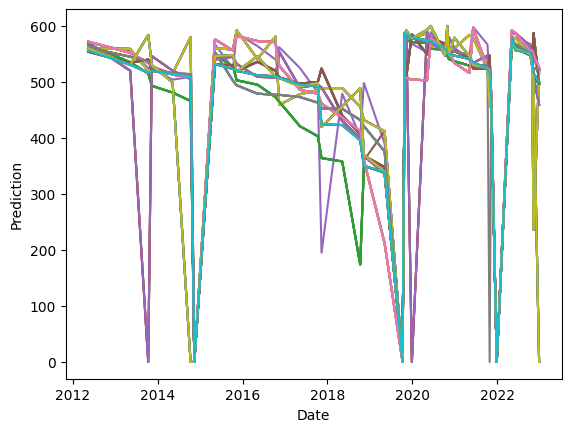

In [135]:
plt.plot(X,y)
plt.xlabel("Date")
plt.ylabel("Prediction")